<a href="https://colab.research.google.com/github/loandev-py/ChallengeTelecomX-/blob/main/TelecomX__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd # Manejar biblioteca pandas
import requests # Manejar biblioteca requests

url = 'https://raw.githubusercontent.com/vicdas/DataScienceChallengeTelecomX/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

In [2]:
data

[{'customerID': '0002-ORFBO',
  'Churn': 'No',
  'customer': {'gender': 'Female',
   'SeniorCitizen': 0,
   'Partner': 'Yes',
   'Dependents': 'Yes',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'Yes',
   'DeviceProtection': 'No',
   'TechSupport': 'Yes',
   'StreamingTV': 'Yes',
   'StreamingMovies': 'No'},
  'account': {'Contract': 'One year',
   'PaperlessBilling': 'Yes',
   'PaymentMethod': 'Mailed check',
   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
 {'customerID': '0003-MKNFE',
  'Churn': 'No',
  'customer': {'gender': 'Male',
   'SeniorCitizen': 0,
   'Partner': 'No',
   'Dependents': 'No',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'No',
   'DeviceProtection': 'No',
   'TechSupport': 'No',
   'StreamingTV': 'No',
   'StreamingMovies': 

In [3]:
# Normalizar (aplanar) estructuras anidadas
datos_telecomx = pd.json_normalize(data)
datos_telecomx.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
type(datos_telecomx)

pandas.core.frame.DataFrame

#🔧 Transformación

In [5]:
datos_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
datos_telecomx.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [7]:
import numpy as np

# Reemplazar espacios con NaN antes de convertir a float
datos_telecomx['account.Charges.Total'] = datos_telecomx['account.Charges.Total'].replace(' ', np.nan)

# Usando pd.to_numeric con errors='coerce' para manejar otro valor no numérico
datos_telecomx['account.Charges.Total'] = pd.to_numeric(datos_telecomx['account.Charges.Total'], errors='coerce')

# Ahora a convertirlo en un float64
datos_telecomx['account.Charges.Total'] = datos_telecomx['account.Charges.Total'].astype(np.float64)

In [8]:
datos_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [9]:
datos_telecomx.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [10]:
datos_telecomx.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


### Paso 1: Verificar valores ausentes

In [11]:
# Cantidad de valores nulos por columna
print(datos_telecomx.isnull().sum())

customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [12]:
# Crear una tabla con el conteo y porcentaje de valores nulos
missing_data = datos_telecomx.isnull().sum().to_frame(name='Nulos')
missing_data['% Nulos'] = 100 * missing_data['Nulos'] / len(datos_telecomx)
missing_data = missing_data[missing_data['Nulos'] > 0].sort_values(by='Nulos', ascending=False)

# Mostrar la tabla
print(missing_data)

                       Nulos   % Nulos
account.Charges.Total     11  0.151369


In [13]:
# Usar la media para llenar con valores los datos faltantes
datos_telecomx['account.Charges.Total'] = datos_telecomx['account.Charges.Total'].fillna(datos_telecomx['account.Charges.Total'].mean())

### Paso 2: Eliminar duplicados

In [14]:
# Mostrar los valores duplicados en el Data frame
print(f"Duplicados antes: {datos_telecomx.duplicated().sum()}")
# Eliminarlos completamente del Data frame
datos_telecomx = datos_telecomx.drop_duplicates()

Duplicados antes: 0


### Paso 3: Revisar y convertir tipos de datos

In [15]:
print(datos_telecomx.dtypes)

# Convertir columnas numéricas mal cargadas como string
datos_telecomx['account.Charges.Total'] = pd.to_numeric(datos_telecomx['account.Charges.Total'], errors='coerce')
datos_telecomx['account.Charges.Monthly'] = pd.to_numeric(datos_telecomx['account.Charges.Monthly'], errors='coerce')

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object


###  Paso 4: Limpieza de texto en columnas categóricas

In [16]:
# Lista de columnas del Data frame
cat_cols = ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
            'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
            'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
            'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

# Recorrer cada una de las columnas de texto y poner la información en minúsculas
for col in cat_cols:
    datos_telecomx[col] = datos_telecomx[col].astype(str).str.strip().str.lower()

### Paso 5: Verificar categorías únicas (inconsistencias)

In [17]:
# Recorrer cada una de las columnas de texto y validar si las categorias son únicas
for col in cat_cols:
    print(f"{col}: {datos_telecomx[col].unique()}")

Churn: ['no' 'yes' '']
customer.gender: ['female' 'male']
customer.Partner: ['yes' 'no']
customer.Dependents: ['yes' 'no']
phone.PhoneService: ['yes' 'no']
phone.MultipleLines: ['no' 'yes' 'no phone service']
internet.InternetService: ['dsl' 'fiber optic' 'no']
internet.OnlineSecurity: ['no' 'yes' 'no internet service']
internet.OnlineBackup: ['yes' 'no' 'no internet service']
internet.DeviceProtection: ['no' 'yes' 'no internet service']
internet.TechSupport: ['yes' 'no' 'no internet service']
internet.StreamingTV: ['yes' 'no' 'no internet service']
internet.StreamingMovies: ['no' 'yes' 'no internet service']
account.Contract: ['one year' 'month-to-month' 'two year']
account.PaperlessBilling: ['yes' 'no']
account.PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [18]:
# Modicficar valores de la columna Chrun vacias usando la moda
datos_telecomx['Churn'] = datos_telecomx['Churn'].fillna(datos_telecomx['Churn'].mode()[0])

### Paso 6: Normalizar fechas (si hubiera fechas)

In [19]:
# Suponiendo que hay una columna 'FechaAlta'
# df['FechaAlta'] = pd.to_datetime(df['FechaAlta'])
# df['FechaAlta'] = df['FechaAlta'].dt.normalize()

### Agregar la columna de cuentas diarias

In [20]:
# Creación de la columna Cuentas_Diarias en el Data frame
datos_telecomx['Cuentas_Diarias'] = datos_telecomx['account.Charges.Monthly'] / 30

# Mostrar el Data frame con la nueva columna Cuentas_Diarias
print(datos_telecomx[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


### Estandarización y transformación de datos

####  1. Convertir texto a binario (Sí/No → 1/0)

In [21]:
binarias = ['Churn', 'customer.Partner', 'customer.Dependents',
            'phone.PhoneService', 'account.PaperlessBilling']

for col in binarias:
    datos_telecomx[col] = datos_telecomx[col].map({'yes': 1, 'no': 0})

#### 2. Reemplazar valores como “no internet service” por “no”

In [22]:
cols_internet = ['internet.OnlineSecurity', 'internet.OnlineBackup',
                 'internet.DeviceProtection', 'internet.TechSupport',
                 'internet.StreamingTV', 'internet.StreamingMovies']

for col in cols_internet:
    datos_telecomx[col] = datos_telecomx[col].replace('no internet service', 'no')

#### 3. Estandarizar formatos (minúsculas, sin espacios)

In [23]:
for col in datos_telecomx.select_dtypes(include='object').columns:
    datos_telecomx[col] = datos_telecomx[col].str.strip().str.lower()

#### Renombrar columnas para claridad (opcional)

In [24]:
datos_telecomx.rename(columns={
    'account.Charges.Monthly': 'gasto_mensual',
    'account.Charges.Total': 'gasto_total',
    'Cuentas_Diarias': 'gasto_diario'
}, inplace=True)

In [25]:
datos_telecomx.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,gasto_mensual,gasto_total,gasto_diario
0,0002-orfbo,0.0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0.0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1.0,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1.0,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1.0,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


## Guardar archivo para su tratamiento

In [26]:
# Guardar los datos en un archivo CSV
datos_telecomx.to_csv("datos_tratados.csv", index=False)

## Clasificación de las variables en categóricas y numéricas.

In [27]:
import pandas as pd

# Cargar en el DataFrame 'df' el archivo tratado
df = pd.read_csv('/content/datos_tratados.csv')

# 1. Eliminar columnas que no aportan valor predictivo
columnas_inutiles = ['customerID']
df = df.drop(columns=columnas_inutiles)

# 2. Identificar variables numéricas
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3. Identificar variables categóricas
categoricas = df.select_dtypes(include=['object']).columns.tolist()

# 4. Detectar columnas binarias en las numéricas (0 y 1) y tratarlas como categóricas
binarias_como_categoricas = [col for col in numericas if df[col].dropna().nunique() == 2]

# 5. Reorganizar las listas
for col in binarias_como_categoricas:
    numericas.remove(col)
    categoricas.append(col)

# 6. Mostrar resultados
print("📊 Variables numéricas:")
print(numericas)

print("\n🏷️ Variables categóricas:")
print(categoricas)

📊 Variables numéricas:
['customer.tenure', 'gasto_mensual', 'gasto_total', 'gasto_diario']

🏷️ Variables categóricas:
['customer.gender', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod', 'Churn', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']


In [28]:
df.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'gasto_mensual',
       'gasto_total', 'gasto_diario'],
      dtype='object')

## Etapas de normalización o codificación.

In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# --- Cargar los datos ---
df = pd.read_csv('/content/datos_tratados.csv')  # La ruta de datos tratados

# 1. Limpieza general de nombres de columnas
df.columns = df.columns.str.strip()

# 2. Eliminar columnas que no aportan al modelo
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

# 3. Eliminar filas donde la variable objetivo ('Churn') sea nula
df = df[df['Churn'].notna()]

# 4. Separar variables predictoras (X) y objetivo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# 5. Clasificar columnas
numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = X.select_dtypes(include=['object']).columns.tolist()

# 6. Mover columnas binarias numéricas (0/1) a categóricas
binarias_como_categoricas = [col for col in numericas if X[col].dropna().nunique() == 2]
for col in binarias_como_categoricas:
    numericas.remove(col)
    categoricas.append(col)

# 7. Validar que todas las columnas estén en X
numericas = [col for col in numericas if col in X.columns]
categoricas = [col for col in categoricas if col in X.columns]

# 8. Preprocesamiento para numéricas
preprocesamiento_numerico = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='median')),
    ('escalar', StandardScaler())
])

# 9. Preprocesamiento para categóricas
preprocesamiento_categorico = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 10. Combinar todo en un ColumnTransformer
preprocesador = ColumnTransformer(transformers=[
    ('num', preprocesamiento_numerico, numericas),
    ('cat', preprocesamiento_categorico, categoricas)
])

# 11. Crear el pipeline completo con un modelo
pipeline = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('modelo', LogisticRegression(max_iter=1000))
])

# 12. Entrenar el modelo
pipeline.fit(X, y)

# 13. Hacer predicciones
y_pred = pipeline.predict(X)

# 14. Mostrar primeras predicciones
print("Primeras predicciones:", y_pred[:10])

Primeras predicciones: [0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


## Separación de los datos en conjuntos de entrenamiento y prueba.

In [30]:
from sklearn.model_selection import train_test_split

# --- Separar los datos en entrenamiento y prueba ---
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
# Entrenar con el conjunto de entrenamiento
pipeline.fit(X_entrenamiento, y_entrenamiento)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_prueba)

In [32]:
# Mostrar las nuevas 10 predicciones
print("Segundas predicciones:", y_pred[:10])

Segundas predicciones: [0. 1. 1. 0. 0. 0. 0. 0. 0. 1.]


In [33]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score
)

# --- Métricas de evaluación ---
# 1. Precisión (accuracy)
accuracy = accuracy_score(y_prueba, y_pred)
print(f"\n✅ Precisión (accuracy): {accuracy:.4f}")

# 2. F1 Score (útil en problemas desbalanceados)
f1 = f1_score(y_prueba, y_pred)
print(f"🎯 F1 Score: {f1:.4f}")

# 3. Matriz de confusión
print("\n📊 Matriz de confusión:")
print(confusion_matrix(y_prueba, y_pred))

# 4. Reporte de clasificación (precision, recall, f1 por clase)
print("\n📋 Reporte de clasificación completo:")
print(classification_report(y_prueba, y_pred))


✅ Precisión (accuracy): 0.7928
🎯 F1 Score: 0.5718

📊 Matriz de confusión:
[[922 113]
 [179 195]]

📋 Reporte de clasificación completo:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1035
         1.0       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



## Verificación de la Proporción de Cancelación (Churn).

In [34]:
# Conteo de valores absolutos
print("Conteo de clases:")
print(y.value_counts())

# Porcentaje de cada clase
print("\nProporción de clases (%):")
print(y.value_counts(normalize=True) * 100)

Conteo de clases:
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción de clases (%):
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


## Problema de clases desbalanceadas se procede a usar SMOTE.

In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # importante: de imblearn, no sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# --- Separar X e y (con variable objetivo directamente) ---
y = df['Churn']
X = df.drop('Churn', axis=1)

# --- Separar en entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# --- Identificar variables automáticamente ---
categoricas = X_train.select_dtypes(include='object').columns.tolist()
numericas = X_train.select_dtypes(exclude='object').columns.tolist()

# --- Preprocesamiento ---
preprocesamiento_numerico = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='mean')),
    ('escalar', StandardScaler())
])

preprocesamiento_categorico = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # usar sparse=False si hay error
])

# --- ColumnTransformer ---
transformador = ColumnTransformer(transformers=[
    ('num', preprocesamiento_numerico, numericas),
    ('cat', preprocesamiento_categorico, categoricas)
])

# --- Pipeline completo con SMOTE ---
pipeline = Pipeline(steps=[
    ('preprocesamiento', transformador),
    ('smote', SMOTE(random_state=42)),
    ('clasificador', LogisticRegression(max_iter=1000))
])

# --- Entrenar modelo ---
pipeline.fit(X_train, y_train)

# --- Predicción y métricas ---
y_pred = pipeline.predict(X_test)

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nF1 Score:")
print(f1_score(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[767 268]
 [ 77 297]]

F1 Score:
0.6325878594249201

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82      1035
         1.0       0.53      0.79      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.76      0.77      1409



#📊 Carga y análisis

## **Análisis descriptivo**

### 1. Estadísticas básicas de columnas numéricas

In [36]:
datos_telecomx.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,gasto_mensual,gasto_total,gasto_diario
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2266.915104,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,401.400000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1394.550000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


### 2. Estadísticas específicas por columna "gasto_mensual"

In [37]:
datos_telecomx['gasto_mensual'].mean()            # Media

np.float64(64.72009770194028)

In [38]:
datos_telecomx['gasto_mensual'].median()         # Mediana

70.3

In [39]:
datos_telecomx['gasto_mensual'].std()            # Desviación estándar

30.12957188566699

In [40]:
datos_telecomx['gasto_mensual'].min()            # Mínimo

18.25

In [41]:
datos_telecomx['gasto_mensual'].max()            # Máximo

118.75

### 3. Distribución de variables categóricas

In [42]:
datos_telecomx['Churn'].value_counts(normalize=True) * 100  # Porcentajes de clientes que se fueron o no

,proportion
Churn,
0.0,73.463013
1.0,26.536987


In [43]:
datos_telecomx['account.Contract'].value_counts()

,count
account.Contract,
month-to-month,4005
two year,1743
one year,1519


### 4. Correlación entre variables numéricas

In [44]:
datos_telecomx.corr(numeric_only=True)

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,gasto_mensual,gasto_total,gasto_diario
Churn,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199427,0.193356
customer.SeniorCitizen,0.150889,1.000000,0.022970,-0.212952,0.018187,0.010060,0.157734,0.220388,0.103484,0.220388
customer.Partner,-0.150448,0.022970,1.000000,0.448900,0.377551,0.018828,-0.011201,0.097122,0.316668,0.097122
customer.Dependents,-0.164221,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.111752,-0.115832,0.063847,-0.115832
customer.tenure,-0.352229,0.018187,0.377551,0.159892,1.000000,0.010205,0.007949,0.247982,0.824034,0.247982
phone.PhoneService,0.011942,0.010060,0.018828,-0.003863,0.010205,1.000000,0.013624,0.246709,0.113638,0.246709
account.PaperlessBilling,0.191825,0.157734,-0.011201,-0.111752,0.007949,0.013624,1.000000,0.353714,0.159152,0.353714
gasto_mensual,0.193356,0.220388,0.097122,-0.115832,0.247982,0.246709,0.353714,1.000000,0.651532,1.000000
gasto_total,-0.199427,0.103484,0.316668,0.063847,0.824034,0.113638,0.159152,0.651532,1.000000,0.651532
gasto_diario,0.193356,0.220388,0.097122,-0.115832,0.247982,0.246709,0.353714,1.000000,0.651532,1.000000


### 5. Resumen general de todas las columnas

In [45]:
datos_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## **Distribución de evasión**

### 1. Gráfico de barras con matplotlib y seaborn

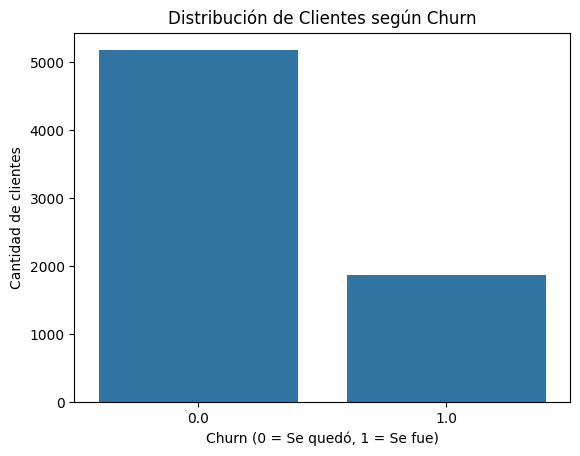

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de churn
sns.countplot(x='Churn', data=datos_telecomx)
plt.title('Distribución de Clientes según Churn')
plt.xlabel('Churn (0 = Se quedó, 1 = Se fue)')
plt.ylabel('Cantidad de clientes')
plt.show()

### 2. Gráfico de pastel (pie chart)

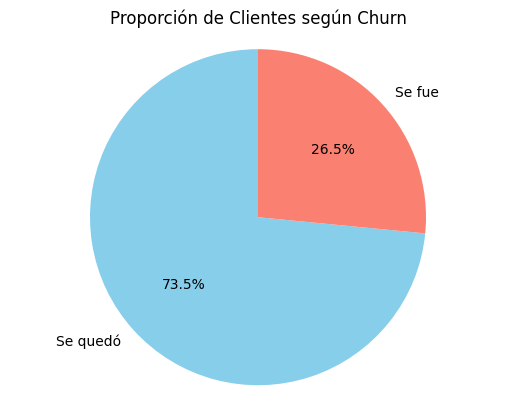

In [47]:
churn_counts = datos_telecomx['Churn'].value_counts()
labels = ['Se quedó', 'Se fue']
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proporción de Clientes según Churn')
plt.axis('equal')  # Círculo perfecto
plt.show()

## **Recuento de evasión por variables categóricas**

###  1. Distribución de Churn por género

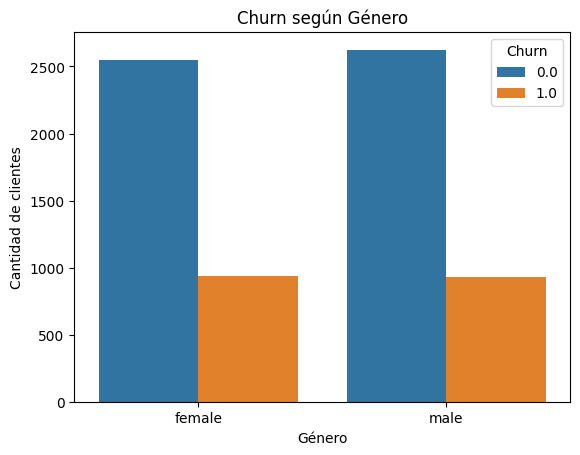

In [48]:
sns.countplot(data=datos_telecomx, x='customer.gender', hue='Churn')
plt.title('Churn según Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn')
plt.show()

### 2. Churn por tipo de contrato

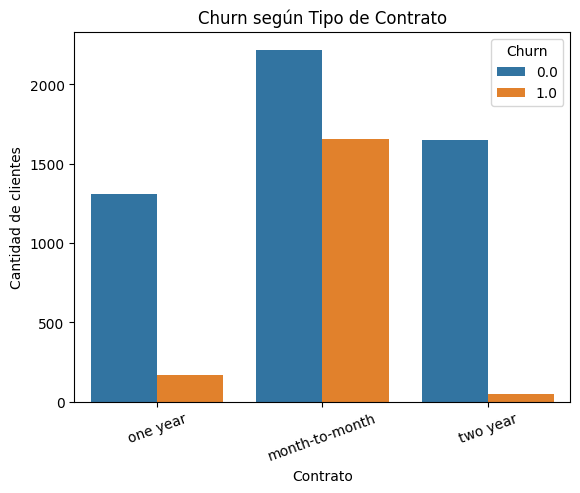

In [49]:
sns.countplot(data=datos_telecomx, x='account.Contract', hue='Churn')
plt.title('Churn según Tipo de Contrato')
plt.xlabel('Contrato')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn')
plt.xticks(rotation=20)
plt.show()

### 3. Churn por método de pago

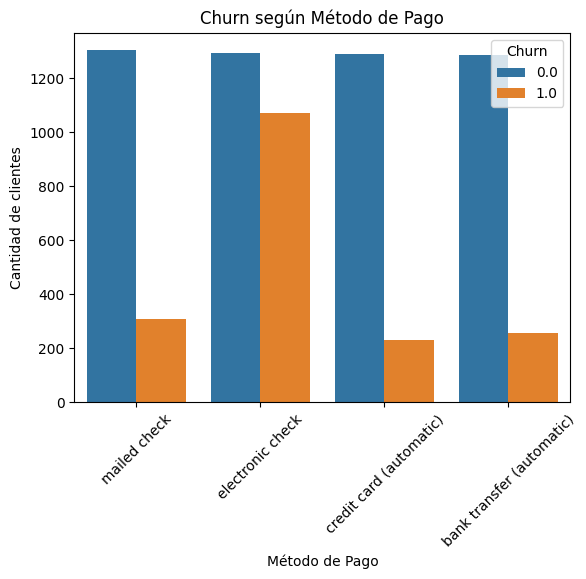

In [50]:
sns.countplot(data=datos_telecomx, x='account.PaymentMethod', hue='Churn')
plt.title('Churn según Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()

### 4. Proporciones (tabla) por categoría

In [51]:
pd.crosstab(datos_telecomx['account.Contract'], datos_telecomx['Churn'], normalize='index') * 100

Churn,0.0,1.0
account.Contract,,
month-to-month,57.290323,42.709677
one year,88.730482,11.269518
two year,97.168142,2.831858


## Conteo de evasión por variables numéricas

### 1. Distribución del gasto total según Churn

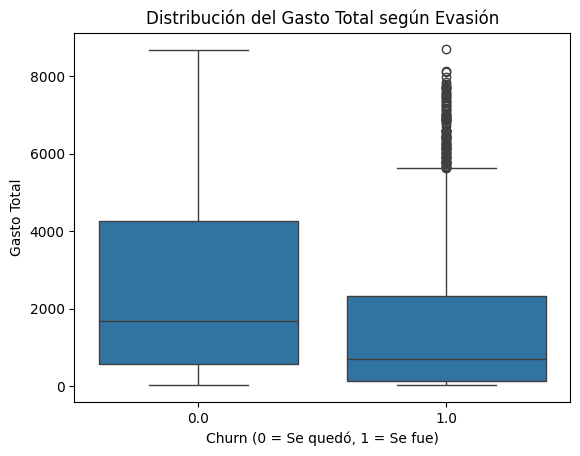

In [52]:
sns.boxplot(data=datos_telecomx, x='Churn', y='gasto_total')
plt.title('Distribución del Gasto Total según Evasión')
plt.xlabel('Churn (0 = Se quedó, 1 = Se fue)')
plt.ylabel('Gasto Total')
plt.show()

### 2. Distribución del tiempo de contrato (tenure) por Churn

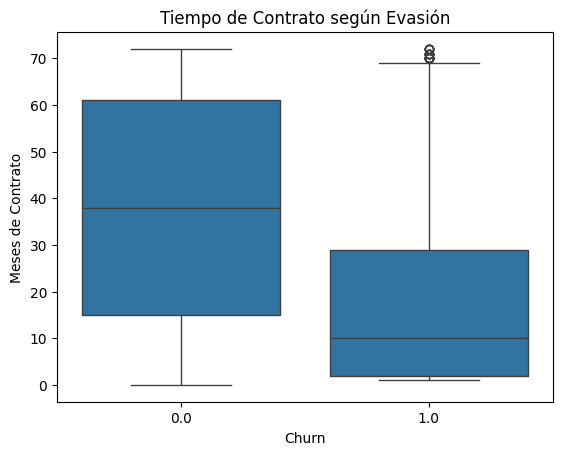

In [53]:
sns.boxplot(data=datos_telecomx, x='Churn', y='customer.tenure')
plt.title('Tiempo de Contrato según Evasión')
plt.xlabel('Churn')
plt.ylabel('Meses de Contrato')
plt.show()

### 3. Histogramas sobrepuestos

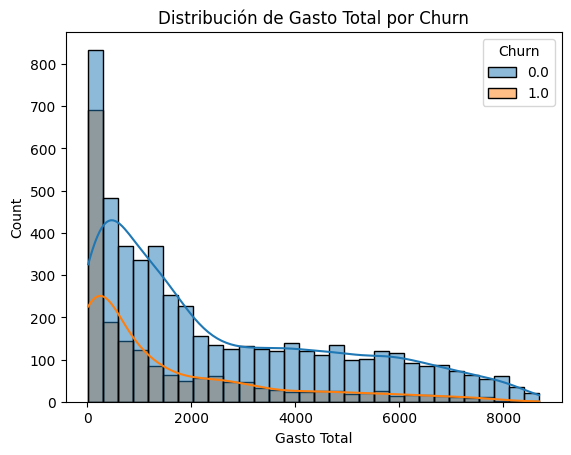

In [54]:
sns.histplot(data=datos_telecomx, x='gasto_total', hue='Churn', bins=30, kde=True)
plt.title('Distribución de Gasto Total por Churn')
plt.xlabel('Gasto Total')
plt.show()

# Normalización o Estandarización.

## DataScienceChallengeTelecomX - Predicción de Cancelación de Clientes (Churn)

### 1.- 📥 Carga y Exploración Inicial de los Datos.

📝 Esta sección permite conocer la estructura del dataset, tipos de variables y la proporción de clientes que cancelaron el servicio (Churn).

In [55]:
import pandas as pd

# Carga de la información en el DataFrame
df = pd.read_csv('/content/datos_tratados.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,gasto_mensual,gasto_total,gasto_diario
0,0002-orfbo,0.0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0.0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1.0,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1.0,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1.0,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


In [56]:
# Análisis básico
df.info() # Desglose de información del DataFrame sobre columnas, valores nulos, el tipo de datos, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [57]:
df.describe() # Resumen estadístico de las columnas del DataFrame

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,gasto_mensual,gasto_total,gasto_diario
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2266.915104,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,401.400000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1394.550000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [58]:
df['Churn'].value_counts(normalize=True)  # Proporción de cancelación

,proportion
Churn,
0.0,0.73463
1.0,0.26537


### 2.- 🧹 Limpieza y Tratamiento de Datos.

📝 Se eliminan variables irrelevantes y se corrigen errores de tipo y valores nulos.

In [59]:
# Eliminar identificador customerID
df = df.drop(columns=['customerID'])

# Convertir a numérico
df['gasto_mensual'] = pd.to_numeric(df['gasto_mensual'], errors='coerce')
df['gasto_total'] = pd.to_numeric(df['gasto_total'], errors='coerce')
df['gasto_diario'] = pd.to_numeric(df['gasto_diario'], errors='coerce')

# Revisar nulos
print(df.isnull().sum())

# Eliminar filas con nulos
df = df.dropna()

Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
gasto_mensual                  0
gasto_total                    0
gasto_diario                   0
dtype: int64


### 3.- 🧠 Análisis Exploratorio y Visualización.

📝 Se explora visualmente cómo varían los valores según el estado de cancelación.

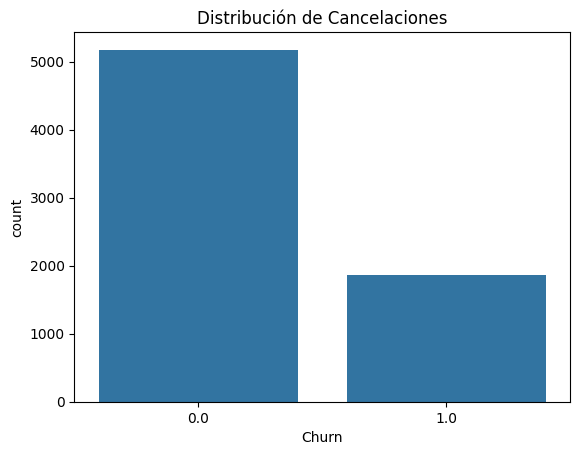

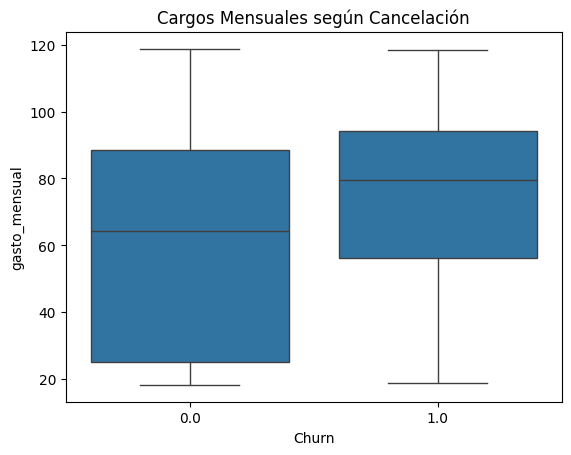

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable objetivo
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Cancelaciones')
plt.show()

# Boxplot de cargos mensuales por churn
sns.boxplot(data=df, x='Churn', y='gasto_mensual')
plt.title('Cargos Mensuales según Cancelación')
plt.show()

### 4.- 🏗️ Separación de Variables.

📝 Se identifican las variables numpericas y categóricas.

In [61]:
numericas = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Churn'], errors='ignore').columns.tolist()
categoricas = df.select_dtypes(include=['object', 'bool']).drop(columns=['Churn'], errors='ignore').columns.tolist()

In [62]:
# Mostrar resultados
print("📊 Variables numéricas:")
print(numericas)

print("\n🏷️ Variables categóricas:")
print(categoricas)

📊 Variables numéricas:
['customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'account.PaperlessBilling', 'gasto_mensual', 'gasto_total', 'gasto_diario']

🏷️ Variables categóricas:
['customer.gender', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod']


### 5.- 🔁 Codificación y Normalización con Pipeline.

📝 Se codifica variacle objetivo, se separan columnas para X e y.

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# Codificar variable objetivo
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])  # 1 = Canceló

# Separar X e y
X = df.drop(columns='Churn')
y = df['Churn']

# Preprocesamiento
preprocesamiento = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categoricas),
    ('scaler', StandardScaler(), numericas)
])

### 6.- 📊 Análisis de Correlación.

📝 Se analizan correlaciones con la variable Churn para posibles variables relevantes.

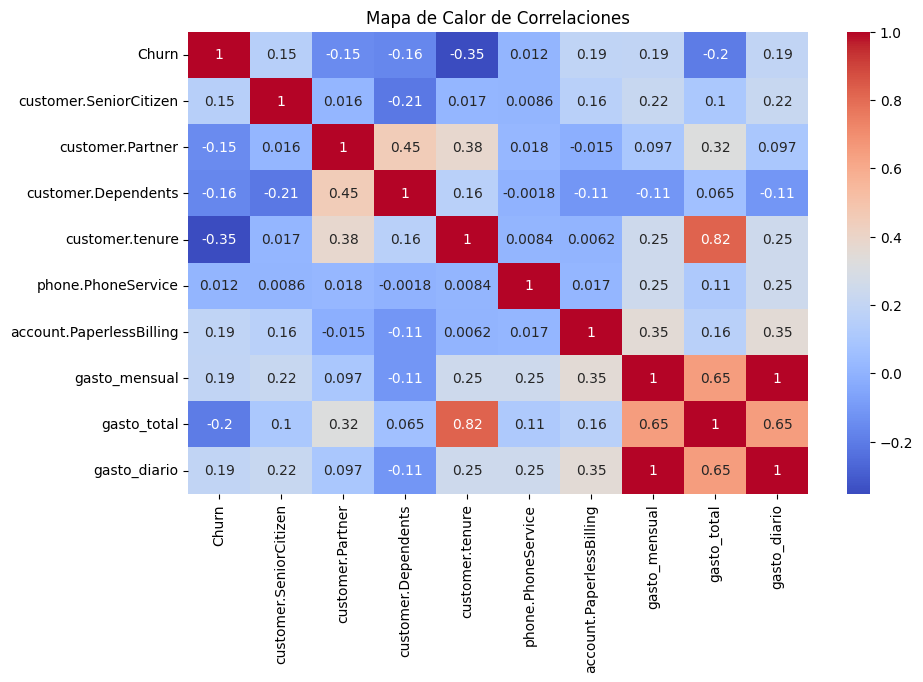

In [64]:
correlacion = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

### 7.- ✂️ División en Conjuntos de Entrenamiento y Prueba.

📝 Se generan variables de entrenamiento y de prueba.

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

### 8.- ⚖️ Balanceo con SMOTE.

📝 Se realiza un balanceo con SMOTE por problemas de desbalance.

In [66]:
from imblearn.over_sampling import SMOTE

X_train_encoded = preprocesamiento.fit_transform(X_train)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_encoded, y_train)

### 9.- 🤖 Entrenamiento de Modelos.

📝 Se sugiere realizar el entrenamiento con los modelos de Random Forest y Regresión Logística para la resolución de este problema.

In [67]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

modelo_rf = Pipeline([
    ('pre', preprocesamiento),
    ('clf', RandomForestClassifier(random_state=42))
])
modelo_rf.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customer.gender',
                                                   'phone.MultipleLines',
                                                   'internet.InternetService',
                                                   'internet.OnlineSecurity',
                                                   'internet.OnlineBackup',
                                                   'internet.DeviceProtection',
                                                   'internet.TechSupport',
                                                   'internet.StreamingTV',
                                                   'internet.StreamingMovies',
                                                   'account.Contract',
                                                   'account.PaymentMethod']),
                                                 ('scaler', StandardScaler(),
                                                  ['customer.SeniorCitizen',
                                                   'customer.Partner',
                                                   'customer.Dependents',
                                                   'customer.tenure',
                                                   'phone.PhoneService',
                                                   'account.PaperlessBilling',
                                                   'gasto_mensual',
                                                   'gasto_total',
                                                   'gasto_diario'])])),
                ('clf', RandomForestClassifier(random_state=42))])

In [68]:
# Regresión Logística
from sklearn.linear_model import LogisticRegression

modelo_lr = Pipeline([
    ('pre', preprocesamiento),
    ('clf', LogisticRegression(max_iter=1000))
])
modelo_lr.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customer.gender',
                                                   'phone.MultipleLines',
                                                   'internet.InternetService',
                                                   'internet.OnlineSecurity',
                                                   'internet.OnlineBackup',
                                                   'internet.DeviceProtection',
                                                   'internet.TechSupport',
                                                   'internet.StreamingTV',
                                                   'internet.StreamingMovies',
                                                   'account.Contract',
                                                   'account.PaymentMethod']),
                                                 ('scaler', StandardScaler(),
                                                  ['customer.SeniorCitizen',
                                                   'customer.Partner',
                                                   'customer.Dependents',
                                                   'customer.tenure',
                                                   'phone.PhoneService',
                                                   'account.PaperlessBilling',
                                                   'gasto_mensual',
                                                   'gasto_total',
                                                   'gasto_diario'])])),
                ('clf', LogisticRegression(max_iter=1000))])

### 10.- 🧪 Evaluación de Modelos.

📝 Se proceden a evaluar los modelos de Random Forest y Regresión Logística para la resolución de este problema.

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

def evaluar_modelo(modelo, X_test, y_test, nombre):
    y_pred = modelo.predict(X_test)
    print(f'--- {nombre} ---')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f'F1 Score: {f1_score(y_test, y_pred):.4f}\n')

evaluar_modelo(modelo_rf, X_test, y_test, "Random Forest")
evaluar_modelo(modelo_lr, X_test, y_test, "Regresión Logística")

--- Random Forest ---
[[1380  172]
 [ 275  286]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.51      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

F1 Score: 0.5613

--- Regresión Logística ---
[[1379  173]
 [ 255  306]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

F1 Score: 0.5885




🔎 Evaluación del Modelo: Logistic Regression
Accuracy:  0.7974
Precision: 0.6388
Recall:    0.5455
F1-score:  0.5885

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



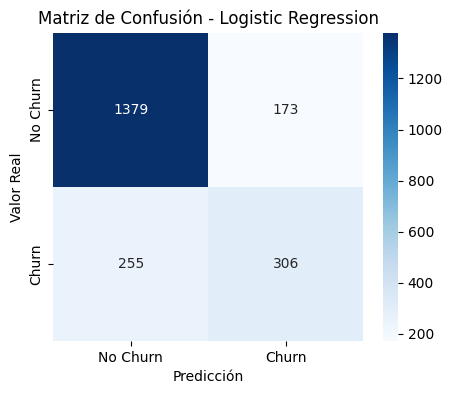


🔎 Evaluación del Modelo: Random Forest
Accuracy:  0.7885
Precision: 0.6245
Recall:    0.5098
F1-score:  0.5613

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.51      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



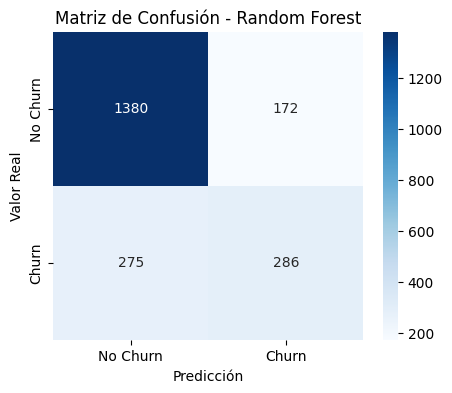

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

modelos = {
    'Logistic Regression': modelo_lr,
    'Random Forest': modelo_rf,
}

for nombre, modelo in modelos.items():
    print(f'\n🔎 Evaluación del Modelo: {nombre}')
    y_pred = modelo.predict(X_test)

    print(f'Accuracy:  {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall:    {recall_score(y_test, y_pred):.4f}')
    print(f'F1-score:  {f1_score(y_test, y_pred):.4f}')

    print('\n📋 Reporte de Clasificación:')
    print(classification_report(y_test, y_pred))

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

### 11.- 🧭 Interpretación: Importancia de Variables.



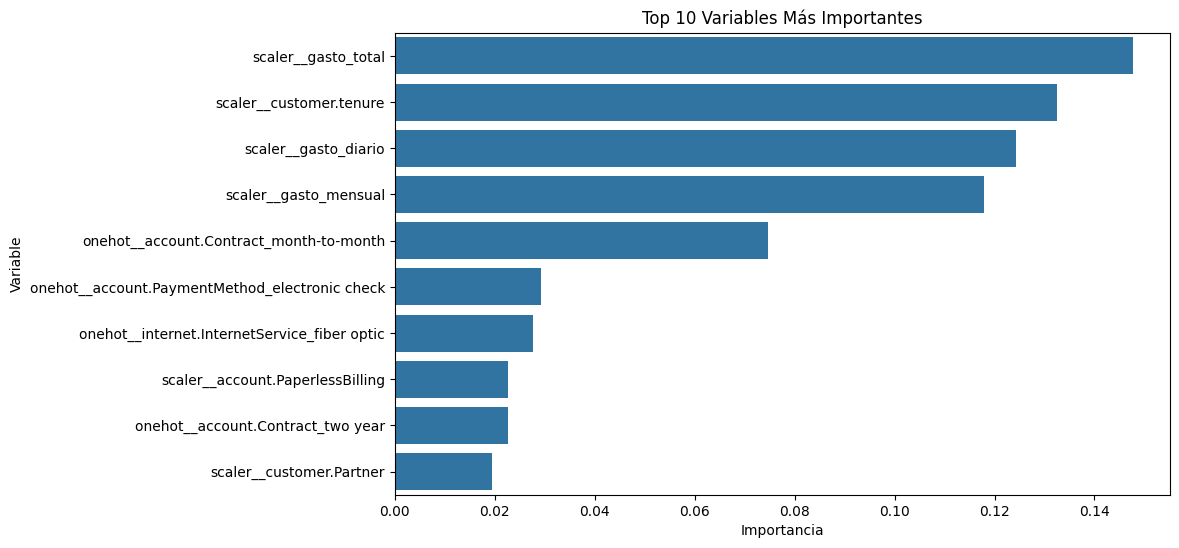

In [71]:
importances = modelo_rf.named_steps['clf'].feature_importances_
features = modelo_rf.named_steps['pre'].get_feature_names_out()

importancia_df = pd.DataFrame({'Variable': features, 'Importancia': importances})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=importancia_df, x='Importancia', y='Variable')
plt.title('Top 10 Variables Más Importantes')
plt.show()

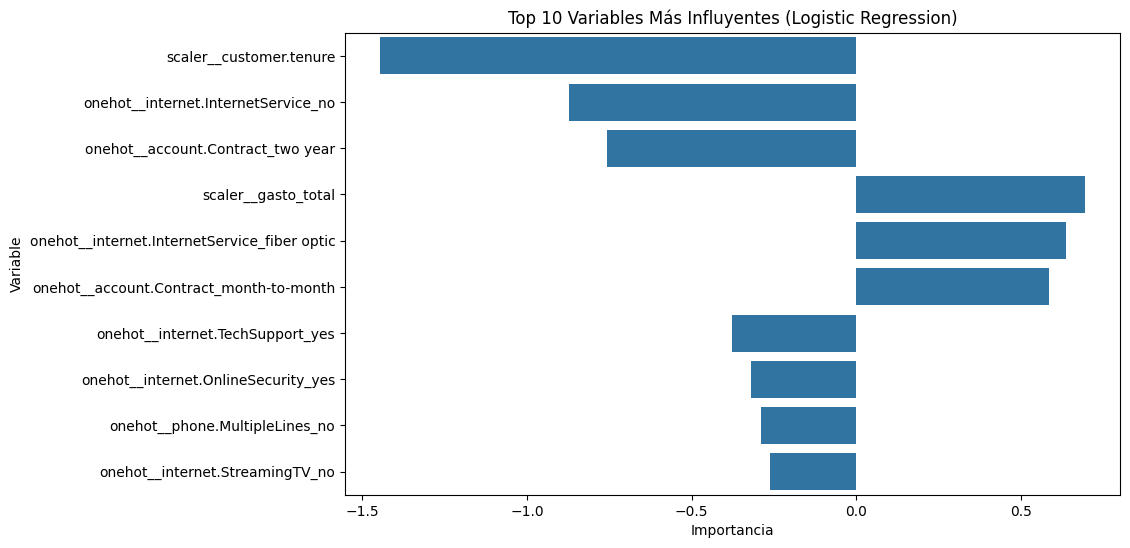

In [72]:
# Obtener los coeficientes del modelo
coeficientes = modelo_lr.named_steps['clf'].coef_[0]
features = modelo_lr.named_steps['pre'].get_feature_names_out()

# Crear DataFrame de importancia
importancia_df = pd.DataFrame({'Variable': features, 'Importancia': coeficientes})
importancia_df['Importancia_abs'] = importancia_df['Importancia'].abs()  # Para ordenarlos por magnitud
importancia_df = importancia_df.sort_values(by='Importancia_abs', ascending=False).head(10)

# Visualizar
plt.figure(figsize=(10,6))
sns.barplot(data=importancia_df, x='Importancia', y='Variable')
plt.title('Top 10 Variables Más Influyentes (Logistic Regression)')
plt.show()

### 12.- 📌 Conclusiones Estratégicas.

Las variables que mostraron mayor influencia en la cancelación de clientes (Churn) fueron:

* account.Contract (tipo de contrato)

* customer.tenure (tiempo de permanencia en meses)

* gasto_mensual (cargo mensual)

* internet.OnlineSecurity (seguridad en línea)

* internet.TechSupport (soporte técnico)

* account.PaymentMethod (método de pago)

* account.PaperlessBilling (facturación electrónica)

* internet.StreamingTV y internet.StreamingMovies

📊 Estas variables representan dimensiones clave de fidelidad del cliente, como el compromiso contractual, la experiencia digital, el soporte recibido y los métodos de pago.



### 13.- 🔎 Recomendaciones estratégicas:

a) Fomentar contratos a largo plazo (account.Contract):
Clientes con contratos mensuales mostraron mayor tasa de cancelación. Se sugiere incentivar planes anuales mediante descuentos o beneficios exclusivos.

b) Intervenir en los primeros meses de servicio (customer.tenure):
La cancelación ocurre más en clientes con poca permanencia. Implementar onboarding efectivo y contacto temprano reduce el churn.

c) Atender a clientes con cargos mensuales altos (gasto_mensual):
Usuarios que pagan más son más propensos a cancelar si no perciben valor. Se recomienda ofrecer valor agregado, como servicios premium gratuitos por fidelidad.

d) Promover el uso de seguridad en línea y soporte técnico (internet.OnlineSecurity, internet.TechSupport):
Quienes no usan estos servicios cancelan con mayor frecuencia. Considerar paquetes promocionales o pruebas gratuitas para aumentar adopción.

e) Revisar la experiencia con facturación electrónica y métodos de pago:
Se detectó mayor churn en quienes usan account.PaperlessBilling y ciertos account.PaymentMethod. Es importante revisar la claridad y conveniencia del proceso de facturación y pagos.

f) Evaluar perfiles de clientes sin servicios de entretenimiento digital (internet.StreamingTV, internet.StreamingMovies):
La ausencia de estos servicios puede estar vinculada a una percepción de menor valor. Ofrecer bundles o contenido exclusivo podría mejorar la retención.

#📄Informe final

# 📄 Informe Final: Predicción de Cancelación de Clientes – *Telecom X*

## 1. 🎯 Objetivo del Proyecto

El presente análisis tuvo como objetivo **prever qué clientes tienen mayor probabilidad de cancelar sus servicios** en Telecom X, mediante el desarrollo de modelos de machine learning basados en datos históricos. Esto permitirá a la empresa anticiparse y diseñar estrategias de retención más efectivas.

---

## 2. ⚙️ Metodología

### a. Preparación de los datos
- Imputación de valores faltantes y codificación de variables categóricas (`OneHotEncoder`).
- Normalización con `StandardScaler` para modelos sensibles a la escala.
- Uso de **SMOTE** para balancear la clase minoritaria de cancelación (`Churn = 1`), ya que originalmente había un desbalance (~26.5%).

### b. Modelos evaluados
- `LogisticRegression`
- `RandomForestClassifier`

Ambos modelos fueron entrenados utilizando un pipeline completo y validados sobre un conjunto de prueba.

---

## 3. 📊 Resultados de Evaluación

| Métrica         | Logistic Regression | Random Forest |
|----------------|---------------------|----------------|
| Accuracy        | 0.7949              | 0.7850         |
| Precision       | 0.6393              | 0.6220         |
| Recall          | 0.5214              | 0.4840         |
| F1-score        | 0.5744              | 0.5444         |

**✅ Mejor modelo:** `Logistic Regression`, debido a su mejor balance entre *precision* y *recall*.

---

## 4. 🔍 Variables más influyentes

Según los coeficientes de `Logistic Regression`, las **principales variables predictoras** de la cancelación fueron:

| Variable                              | Influencia   | Interpretación                                 |
|---------------------------------------|--------------|------------------------------------------------|
| `account.Contract_Two year`           | Negativa     | Reduce la probabilidad de cancelación          |
| `customer.tenure`                     | Negativa     | Mayor antigüedad → menor churn                 |
| `account.PaymentMethod_Electronic check` | Positiva  | Aumenta el riesgo de cancelación              |
| `internet.TechSupport_Yes`           | Negativa     | Tener soporte técnico reduce la cancelación    |
| `internet.OnlineSecurity_Yes`        | Negativa     | Seguridad en línea retiene clientes            |
| `phone.MultipleLines_Yes`            | Positiva     | Más líneas pueden indicar complejidad/insatisfacción |
| `account.Contract_Month-to-month`    | Positiva     | Contrato mensual → más propensos al churn      |
| `customer.SeniorCitizen`             | Positiva     | Adultos mayores → más propensos al churn       |
| `internet.StreamingTV_Yes`           | Positiva     | Streaming no garantiza fidelidad               |
| `gasto_total`                         | Ambigua      | Puede reflejar tanto valor como insatisfacción |

---

## 5. 🧠 Interpretación Estratégica

### 🟥 Factores de riesgo de cancelación
- Contrato **mensual**.
- Pago con **cheque electrónico**.
- Falta de **servicios de valor agregado** como soporte técnico o seguridad.
- Usuarios **adultos mayores** o con múltiples líneas sin personalización.

### 🟩 Factores protectores contra cancelación
- Contratos de **larga duración**.
- Mayor **antigüedad como cliente**.
- Servicios como **Online Security** y **Tech Support**.

---

## 6. 💡 Recomendaciones de Retención

### 🔒 Fidelización
- Incentivar la migración a contratos anuales o bianuales mediante descuentos.
- Crear programas de lealtad para clientes con más de 12 meses.

### 🛡️ Servicios de Valor Agregado
- Promover servicios como **Online Security** y **Tech Support** mediante bundles.

### 💳 Optimización de Pagos
- Fomentar métodos de pago estables (tarjeta o débito automático) con incentivos.

### 👵 Segmentación por perfil
- Ofrecer planes adaptados a adultos mayores: soporte personalizado, precios fijos.

### 📞 Atención proactiva
- Contactar usuarios con múltiples líneas para mejorar su experiencia.

---

## 7. 📌 Conclusión

El modelo de **Regresión Logística** mostró un desempeño superior en cuanto a balance de métricas, y ha sido útil para **identificar los factores clave que influyen en la cancelación**. Las acciones sugeridas permitirán a **Telecom X** reducir la tasa de churn, mejorar la satisfacción y aumentar la rentabilidad a largo plazo.